In [1]:
import os
os.getcwd()

'C:\\Users\\USER'

In [3]:
os.chdir('C:\\Users\\USER\\Documents\\python_works')

In [100]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn.preprocessing as pre 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import statsmodels.tools as tools

In [123]:
df = pd.read_csv('hr_employee_churn_data.csv', index_col = 'empid')

In [124]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
empid,,,,,,,,,
1,0.38,0.53,2,157,3,0,0,low,1
2,0.80,0.86,5,262,6,0,0,medium,1
3,0.11,0.88,7,272,4,0,0,medium,1
4,0.72,0.87,5,223,5,0,0,low,1
5,0.37,0.52,2,159,3,0,0,low,1
...,...,...,...,...,...,...,...,...,...
14995,0.40,0.57,2,151,3,0,0,low,1
14996,0.37,0.48,2,160,3,0,0,low,1
14997,0.37,0.53,2,143,3,0,0,low,1


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 1 to 14999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14997 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   salary                 14999 non-null  object 
 8   left                   14999 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 1.1+ MB


In [126]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14997.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612863,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,0.248634,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [127]:
df = df.dropna()

In [128]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
empid,,,,,,,,,
1,0.38,0.53,2,157,3,0,0,low,1
2,0.80,0.86,5,262,6,0,0,medium,1
3,0.11,0.88,7,272,4,0,0,medium,1
4,0.72,0.87,5,223,5,0,0,low,1
5,0.37,0.52,2,159,3,0,0,low,1
...,...,...,...,...,...,...,...,...,...
14995,0.40,0.57,2,151,3,0,0,low,1
14996,0.37,0.48,2,160,3,0,0,low,1
14997,0.37,0.53,2,143,3,0,0,low,1


In [129]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'left'],
      dtype='object')

In [130]:
num_col = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']

In [131]:
df[num_col]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
empid,,,,,
1,0.38,0.53,2,157,3
2,0.80,0.86,5,262,6
3,0.11,0.88,7,272,4
4,0.72,0.87,5,223,5
5,0.37,0.52,2,159,3
...,...,...,...,...,...
14995,0.40,0.57,2,151,3
14996,0.37,0.48,2,160,3
14997,0.37,0.53,2,143,3


In [132]:
cat_col = ['Work_accident','promotion_last_5years', 'salary', 'left']
df[cat_col]

,Work_accident,promotion_last_5years,salary,left
empid,,,,
1,0,0,low,1
2,0,0,medium,1
3,0,0,medium,1
4,0,0,low,1
5,0,0,low,1
...,...,...,...,...
14995,0,0,low,1
14996,0,0,low,1
14997,0,0,low,1


In [133]:
for i in cat_col:
    print(df[i].value_counts())
  

0    12828
1     2169
Name: Work_accident, dtype: int64
0    14678
1      319
Name: promotion_last_5years, dtype: int64
low       7314
medium    6446
high      1237
Name: salary, dtype: int64
0    11428
1     3569
Name: left, dtype: int64


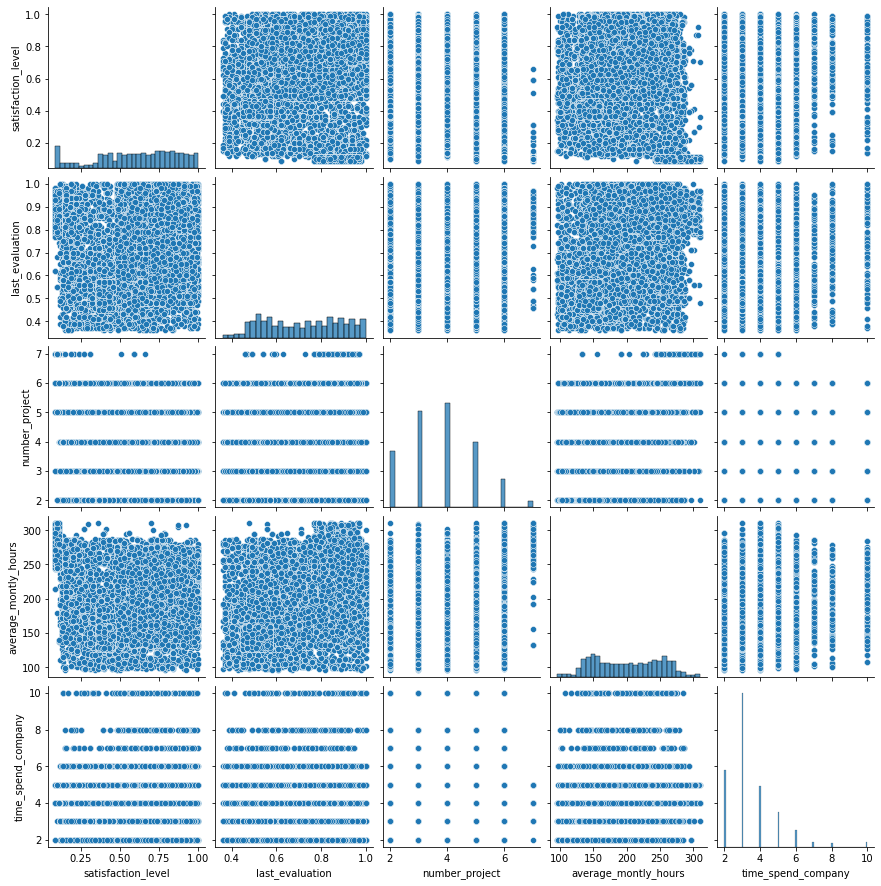

In [134]:
sns.pairplot(df[num_col])

<AxesSubplot:>

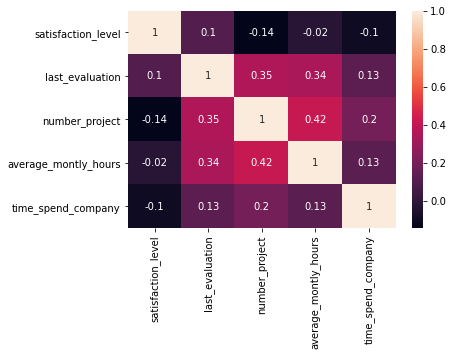

In [135]:
sns.heatmap(df[num_col].corr(), annot = True)

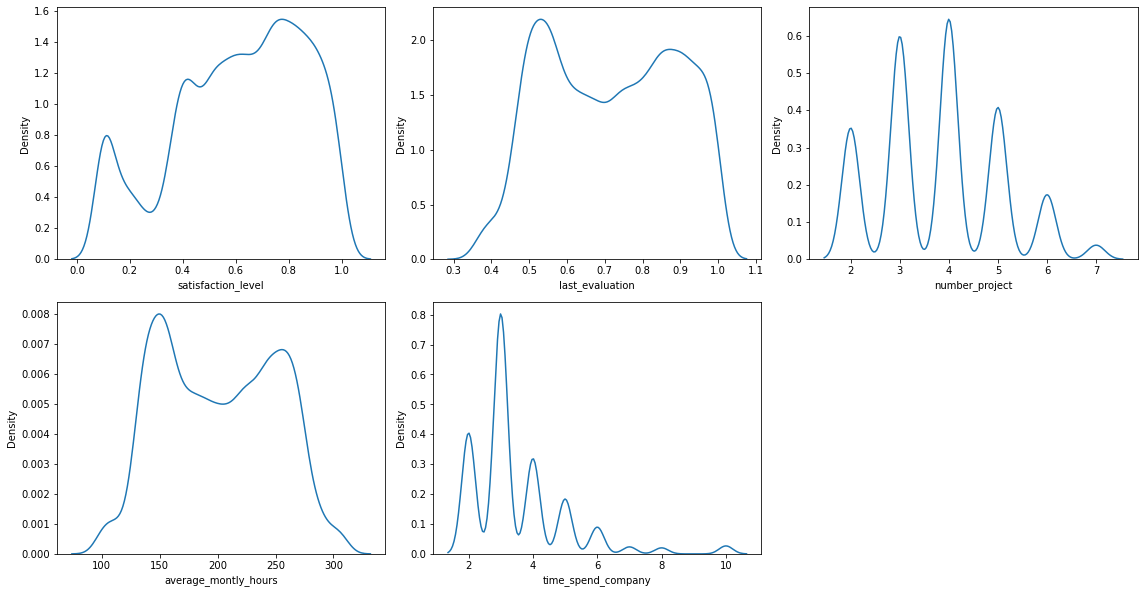

In [136]:
plt.figure(figsize = (16,12))
for i in range(len(num_col)):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(df[num_col[i]])
plt.tight_layout()
plt.show()

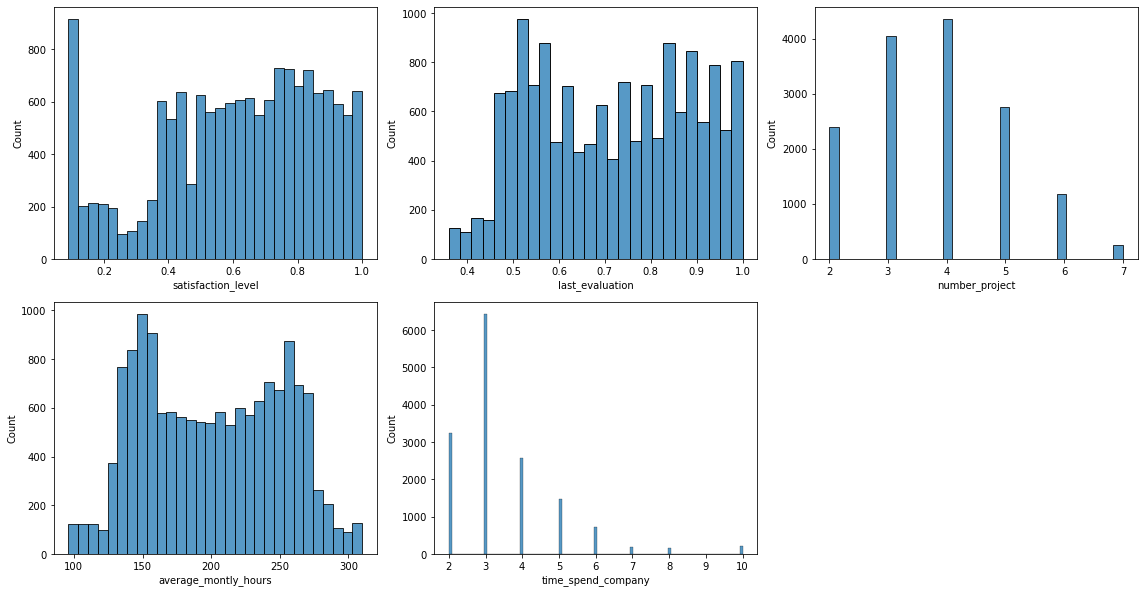

In [137]:
plt.figure(figsize = (16,12))
for i in range(len(num_col)):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[num_col[i]])
plt.tight_layout()
plt.show()

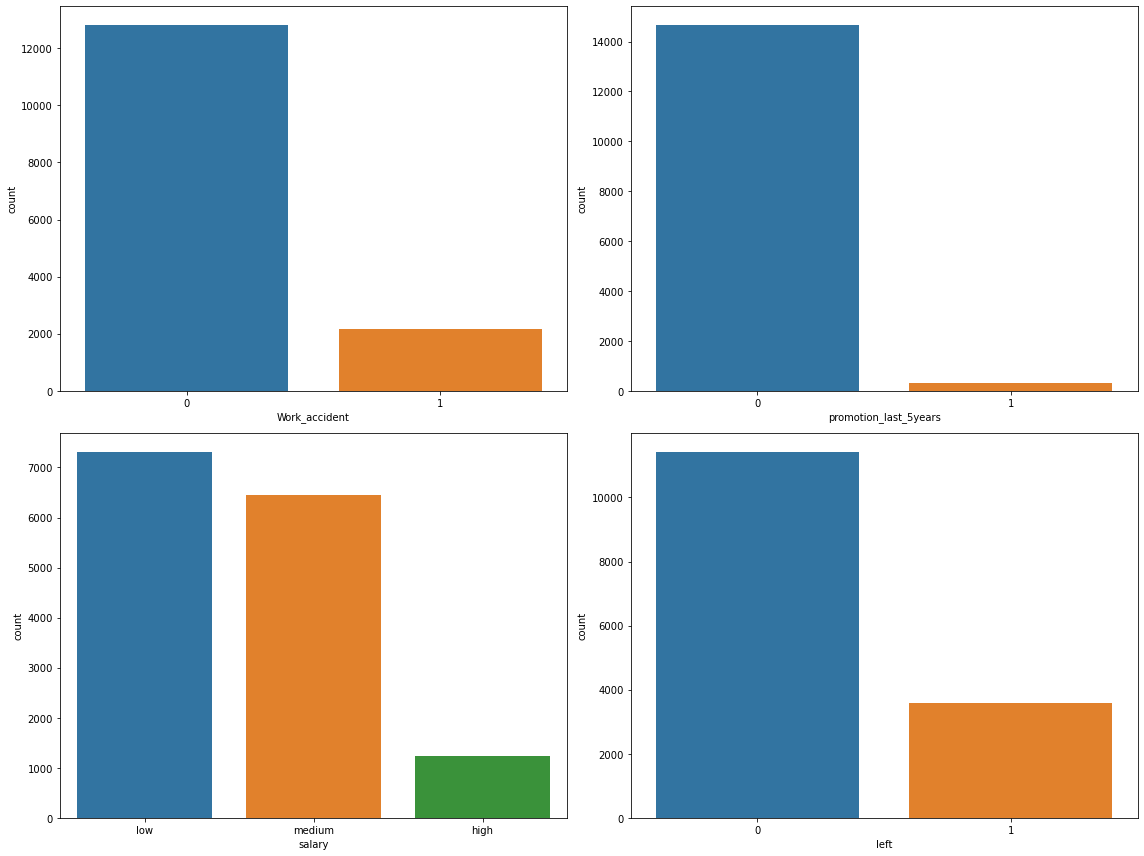

In [138]:
plt.figure(figsize = (16,12))
for i in range(len(cat_col)):
    plt.subplot(2, 2, i+1)
    sns.countplot(df[cat_col[i]])
plt.tight_layout()
plt.show()

In [139]:
cat_col

['Work_accident', 'promotion_last_5years', 'salary', 'left']

In [140]:
for i in range(len(cat_col)):
    if i == 2:
        print([cat_col[i]])

['salary']


In [141]:
lb = pre.LabelEncoder()

In [142]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
empid,,,,,,,,,
1,0.38,0.53,2,157,3,0,0,low,1
2,0.80,0.86,5,262,6,0,0,medium,1
3,0.11,0.88,7,272,4,0,0,medium,1
4,0.72,0.87,5,223,5,0,0,low,1
5,0.37,0.52,2,159,3,0,0,low,1
...,...,...,...,...,...,...,...,...,...
14995,0.40,0.57,2,151,3,0,0,low,1
14996,0.37,0.48,2,160,3,0,0,low,1
14997,0.37,0.53,2,143,3,0,0,low,1


In [144]:
cat_col_1 = ['Work_accident', 'promotion_last_5years', 'left']

In [145]:
for i in cat_col_1:
    df[i] = lb.fit_transform(df[i])
    

In [146]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
empid,,,,,,,,,
1,0.38,0.53,2,157,3,0,0,low,1
2,0.80,0.86,5,262,6,0,0,medium,1
3,0.11,0.88,7,272,4,0,0,medium,1
4,0.72,0.87,5,223,5,0,0,low,1
5,0.37,0.52,2,159,3,0,0,low,1
...,...,...,...,...,...,...,...,...,...
14995,0.40,0.57,2,151,3,0,0,low,1
14996,0.37,0.48,2,160,3,0,0,low,1
14997,0.37,0.53,2,143,3,0,0,low,1


In [149]:
dm = pd.get_dummies(df.salary, prefix = 'salary')

In [150]:
dm

,salary_high,salary_low,salary_medium
empid,,,
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0
5,0,1,0
...,...,...,...
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [151]:
new_df = df.join(dm)

In [152]:
new_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,salary_high,salary_low,salary_medium
empid,,,,,,,,,,,,
1,0.38,0.53,2,157,3,0,0,low,1,0,1,0
2,0.80,0.86,5,262,6,0,0,medium,1,0,0,1
3,0.11,0.88,7,272,4,0,0,medium,1,0,0,1
4,0.72,0.87,5,223,5,0,0,low,1,0,1,0
5,0.37,0.52,2,159,3,0,0,low,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.40,0.57,2,151,3,0,0,low,1,0,1,0
14996,0.37,0.48,2,160,3,0,0,low,1,0,1,0
14997,0.37,0.53,2,143,3,0,0,low,1,0,1,0


In [156]:
new_df['left_'] = new_df['left']
new_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,salary_high,salary_low,salary_medium,salaries,left_
empid,,,,,,,,,,,,,,
1,0.38,0.53,2,157,3,0,0,low,1,0,1,0,low,1
2,0.80,0.86,5,262,6,0,0,medium,1,0,0,1,medium,1
3,0.11,0.88,7,272,4,0,0,medium,1,0,0,1,medium,1
4,0.72,0.87,5,223,5,0,0,low,1,0,1,0,low,1
5,0.37,0.52,2,159,3,0,0,low,1,0,1,0,low,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.40,0.57,2,151,3,0,0,low,1,0,1,0,low,1
14996,0.37,0.48,2,160,3,0,0,low,1,0,1,0,low,1
14997,0.37,0.53,2,143,3,0,0,low,1,0,1,0,low,1


In [158]:
new_df = new_df.drop(['salary', 'left','salaries'], axis = 1)

In [159]:
new_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium,left_
empid,,,,,,,,,,,
1,0.38,0.53,2,157,3,0,0,0,1,0,1
2,0.80,0.86,5,262,6,0,0,0,0,1,1
3,0.11,0.88,7,272,4,0,0,0,0,1,1
4,0.72,0.87,5,223,5,0,0,0,1,0,1
5,0.37,0.52,2,159,3,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
14995,0.40,0.57,2,151,3,0,0,0,1,0,1
14996,0.37,0.48,2,160,3,0,0,0,1,0,1
14997,0.37,0.53,2,143,3,0,0,0,1,0,1


<AxesSubplot:>

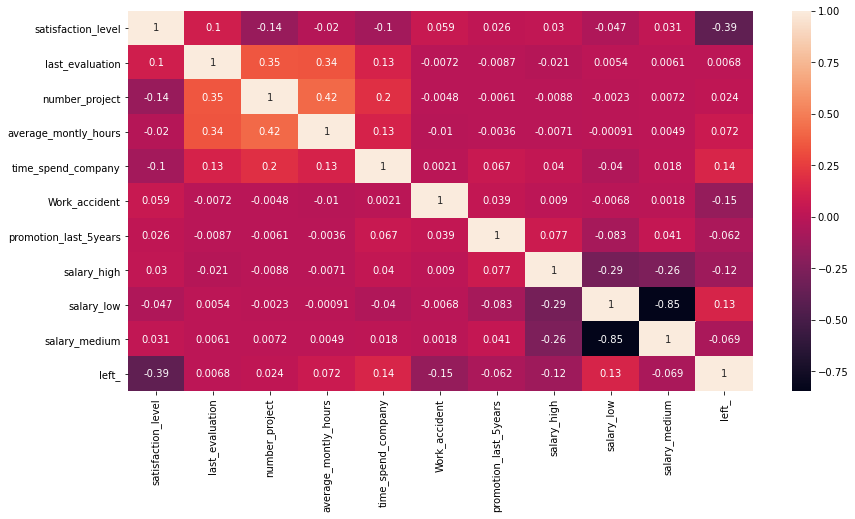

In [161]:
plt.figure(figsize = (14,7))
sns.heatmap(new_df.corr(), annot = True)

In [164]:
x = new_df.drop('left_', axis = 1)

In [165]:
x = sm.add_constant(x)

In [166]:
x

,const,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium
empid,,,,,,,,,,,
1,1.0,0.38,0.53,2,157,3,0,0,0,1,0
2,1.0,0.80,0.86,5,262,6,0,0,0,0,1
3,1.0,0.11,0.88,7,272,4,0,0,0,0,1
4,1.0,0.72,0.87,5,223,5,0,0,0,1,0
5,1.0,0.37,0.52,2,159,3,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
14995,1.0,0.40,0.57,2,151,3,0,0,0,1,0
14996,1.0,0.37,0.48,2,160,3,0,0,0,1,0
14997,1.0,0.37,0.53,2,143,3,0,0,0,1,0


In [167]:
y = new_df.left_

In [168]:
y

empid
1        1
2        1
3        1
4        1
5        1
        ..
14995    1
14996    1
14997    1
14998    1
14999    1
Name: left_, Length: 14997, dtype: int64

In [170]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = .30, stratify = y, random_state = 42)

In [171]:
model = LogisticRegression()

In [172]:
model.fit(X_train, y_train)

LogisticRegression()

In [173]:
model.intercept_

array([-0.11131112])

In [174]:
model.coef_

array([[-0.09868428, -4.28547137,  0.45575317, -0.32090759,  0.00483343,
         0.26237799, -1.39089723, -0.76352927, -1.27572094,  0.86822062,
         0.30881604]])

In [175]:
x.columns

Index(['const', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary_high', 'salary_low', 'salary_medium'],
      dtype='object')

In [187]:
model = sm.Logit(y_train, X_train.drop('salary_high', axis = 1)).fit()

Optimization terminated successfully.
         Current function value: 0.426058
         Iterations 7


In [188]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  left_   No. Observations:                10497
Model:                          Logit   Df Residuals:                    10487
Method:                           MLE   Df Model:                            9
Date:                Thu, 18 May 2023   Pseudo R-squ.:                  0.2236
Time:                        13:48:38   Log-Likelihood:                -4472.3
converged:                       True   LL-Null:                       -5760.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.5871      0.208     -7.622      0.000      -1.995      -1.179
satisfaction_level       -4.2593      0.118    -35.947      0.000      -4.491      -4.027
last_evaluation           0.7067      0.179      3.948      0.000       0.356       1.058
number_project           -0.3253      0.025    -12.760      0.000      -0.375      -0.275
average_montly_hours      0.0045      0.001      7.354      0.000       0.003       0.006
time_spend_company        0.2679      0.018     14.491      0.000       0.232       0.304
Work_accident            -1.5388      0.106    -14.562      0.000      -1.746      -1.332
promotion_last_5years    -1.4442      0.312     -4.636      0.000      -2.055      -0.834
salary_low                2.1242      0.156     13.595      0.000       1.818       2.430
salary_medium             1.5660      0.157      9.958      0.000       1.258       1.874
=========================================================================================
"""

In [179]:
df.salary.value_counts()

low       7314
medium    6446
high      1237
Name: salary, dtype: int64

<AxesSubplot:xlabel='salary', ylabel='count'>

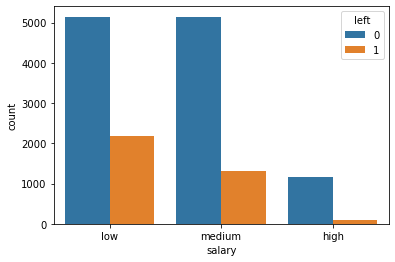

In [182]:
sns.countplot(df.salary, hue = df.left)

In [190]:
log_reg_odds = pd.DataFrame(np.exp(model.params), columns= ['coefficients'])
log_reg_odds['z-value']= model.pvalues
log_reg_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())
log_reg_odds

,coefficients,z-value,2.5%,97.5%
const,0.204524,2.506972e-14,0.135986,0.307606
satisfaction_level,0.014133,5.645417e-283,0.011204,0.017827
last_evaluation,2.027277,7.872795e-05,1.427437,2.879182
number_project,0.722306,2.744928e-37,0.687101,0.759315
average_montly_hours,1.004550,1.920246e-13,1.003335,1.005766
time_spend_company,1.307220,1.371186e-47,1.260702,1.355454
Work_accident,0.214631,4.895786e-48,0.174479,0.264024
promotion_last_5years,0.235940,3.557398e-06,0.128122,0.434491
salary_low,8.366563,4.271535e-42,6.159536,11.364391
salary_medium,4.787257,2.332136e-23,3.517443,6.515481


In [192]:
y_pred = model.predict(X_test.drop('salary_high', axis = 1))

In [194]:
y_pred =round(model.predict(X_test.drop('salary_high', axis = 1)))

In [195]:
y_pred

empid
3947     0.0
10653    1.0
5331     0.0
2670     1.0
10165    0.0
        ... 
8920     0.0
9652     1.0
9138     0.0
14819    1.0
8842     0.0
Length: 4500, dtype: float64

In [196]:
confusion_matrix(y_test, y_pred)

array([[3163,  266],
       [ 704,  367]], dtype=int64)

In [197]:
accuracy_score(y_test, y_pred)

0.7844444444444445

In [199]:
3530/4500

0.7844444444444445

,0,1
const,-1.995203,-1.178936
satisfaction_level,-4.491492,-4.027030
last_evaluation,0.355880,1.057506
number_project,-0.375275,-0.275338
average_montly_hours,0.003330,0.005749
time_spend_company,0.231669,0.304136
Work_accident,-1.745951,-1.331716
promotion_last_5years,-2.054771,-0.833581
salary_low,1.818001,2.430485
salary_medium,1.257734,1.874181


In [201]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
empid,,,,,,,,,
1,0.38,0.53,2,157,3,0,0,low,1
2,0.80,0.86,5,262,6,0,0,medium,1
3,0.11,0.88,7,272,4,0,0,medium,1
4,0.72,0.87,5,223,5,0,0,low,1
5,0.37,0.52,2,159,3,0,0,low,1
...,...,...,...,...,...,...,...,...,...
14995,0.40,0.57,2,151,3,0,0,low,1
14996,0.37,0.48,2,160,3,0,0,low,1
14997,0.37,0.53,2,143,3,0,0,low,1


<AxesSubplot:xlabel='left', ylabel='count'>

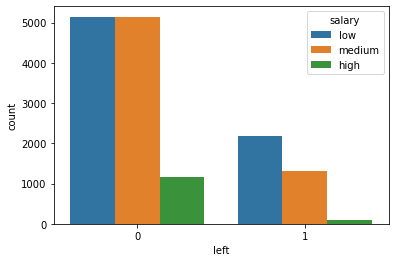

In [202]:
sns.countplot(df.left, hue = df.salary)